# Melanoma detection using tranfer learning and image augmentation 

### Inside this project we will use the feature detection of a VGG16 Neural network trained into the IMAGENET dataset and image augmentaion process to increase the number of cases to be used for treining and testing 

> https://www.kaggle.com/amyjang/tensorflow-transfer-learning-melanoma

In [2]:
# Import modules that will be used into the project 

import tensorflow as tf
import os
import zipfile
import random
from shutil import copyfile
from skimage import io
from skimage.util import random_noise
from skimage.transform import resize
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
import numpy as np



In [10]:
# define function to create working director for data

def create_directory(source:str, object_list:list):
    """Check if the directory desired already exist into the provided path and create it otherwise"""
    for obj in object_list:
        created_path = os.path.join(source, obj)
        if os.path.exists(created_path):
            print("Directory path "+ str(created_path)+ " already exist")
        else: 
            os.mkdir(created_path)
            print("Directory " + str(created_path) + " created ")


# define function to extract only the interest area of image

def get_spot(source:str, pic:str, destination:str):
    """This function will take a path to image and extract the area of interest, creating a new one, 
    with only the area of desired information.
    input:
     - source: string of folder where images are located
     - pic: string with name of image to be processed
     - destination: string with location to where to save processed image
    result: 
     - image with same name to the original one""" 

    
    image = io.imread(os.path.join(source,pic))
    img_gray = rgb2gray(image)
    thresh = threshold_otsu(img_gray)
    mask = img_gray < thresh
    for i in range(3):
        image[:,:,i] = image[:,:,i] * mask
    io.imshow(image)
    io.imsave(os.path.join(destination, pic), image)



# define function to validate if image is not corrupted and split data into test and training sets

def split_data(source:str, training:str, testing:str, split_size:float):
    """
    Function to validate if data is not corrupted and 
    split it into training and test sets. 
    """
    data_list = os.listdir(source)
    random.seed(10)
    train_list = random.sample(data_list, int(len(data_list) * split_size), )
    for pic in data_list:
        pic_path = os.path.join(source,pic)
        if os.path.getsize(pic_path) > 0: # file not empty/corrupted
             if pic in train_list:
                 #training_path = os.path.join(training,pic)
                 #copyfile(pic_path,training_path)
                 #training_path = '' # clear path
                 get_spot(source,pic,training)
             else:
                 #testing_path = os.path.join(testing, pic)
                 #copyfile(pic_path, testing_path)
                 #testing_path = '' # clear path
                 get_spot(source,pic,testing)
        pic_path = '' # clear path
    print("Dataset cleanse and sorting completed")


# define function to make data augmentaion and save files into directory with specific tag and ID

def img_augment(source:str, methods:list = ["flipud", "fliplr", "noise"], tag:str = "aug"):
    """
    Function will use skimage and Numpy package to generate new images based of prebuilt functions
    to increase volumn of data. 
    methods: functions from skimage to be used ["flipud", "fliplr", "noise"]
    tag: added string to the end of original image
    """
    counter = 0 # init a counter to add to end of each image
    data_list = os.listdir(source)
    for pic in data_list:
        pic_path = os.path.join(source,pic)
        img = io.imread(pic_path)
        if "flipud" in methods:
            aug = np.flipud(img)
            counter = counter + 1
            img_name = str(tag) + "_" + str(counter) + "_" + str(pic) 
            io.imsave(os.path.join(source, img_name), aug)
            aug = []
            img_name = '' # clear string 
        if "fliplr" in methods:
            aug = np.fliplr(img)
            counter = counter + 1
            img_name = str(tag) + "_" + str(counter) + "_" + str(pic) 
            io.imsave(os.path.join(source, img_name), aug)
            aug = []
            img_name = '' # clear string
        if "noise" in methods:
            aug = random_noise(img)
            counter = counter + 1
            img_name = str(tag) + "_" + str(counter) + "_" + str(pic) 
            io.imsave(os.path.join(source, img_name), aug)
            aug = []
            img_name = '' # clear string 
        pic_path = '' # clear path
        img = []
    print(f"Data Augmentation completed for folder {source}")


# create function to predict labels using model

def pred_model(folder:str, shape:tuple ,model):
    prediction = []
    image_list = os.listdir(folder)
    for image in image_list:
        source = os.path.join(folder,image)
        img = io.imread(source)
        img = resize(img,shape)
        img = np.expand_dims(img, axis=0)
        #print(f"Image {image} have the shape {img.shape}")
        prediction.append(model.predict(img))
    
    return prediction

        
        

In [11]:
# define source zip, folders to be used and build directories
 
local_zip = "./Base.zip" # path where your zip images are located (global or related to this file)
zip_ref = zipfile.ZipFile(local_zip, 'r') # configure as read
zip_ref.extractall('/tmp') # extract information to temporary 
zip_ref.close()

In [12]:
# create working directories
create_directory("./", ["train", "test"]) #folders for test and train data
create_directory("./train", ["Positive","Negative"]) # folders for positive and negative scenarios inside train
create_directory("./test", ["Positive","Negative"]) #folders for positive and negative scenarios inside test

Directory ./train created 
Directory ./test created 
Directory ./train/Positive created 
Directory ./train/Negative created 
Directory ./test/Positive created 
Directory ./test/Negative created 


Dataset cleanse and sorting completed
Dataset cleanse and sorting completed


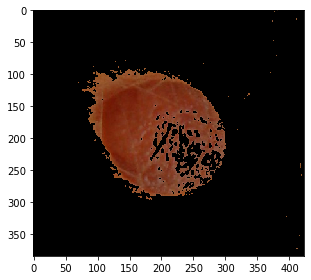

In [13]:
# split data between test and train structures

split_data("/tmp/Base/Positivos", "./train/Positive", "./test/Positive", 0.8) # split for positive images
split_data("/tmp/Base/Negativos", "./train/Negative", "./test/Negative", 0.8) # split for negative images

In [14]:
# create aumentation for files
img_augment("./train/Positive") # augument train data for positive cases
img_augment("./train/Negative") # augument train data for negative cases
img_augment("./test/Positive") # augument test data for positive cases
img_augment("./test/Negative") # augument test data for negative cases

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Data Augmentation completed for folder ./train/Positive


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Data Augmentation completed for folder ./train/Negative


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Data Augmentation completed for folder ./test/Positive


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Data Augmentation completed for folder ./test/Negative


In [15]:
# load VGG16 model pre-trained with IMAGENET
IMAGE_RESIZE = [256, 256]

base_model = tf.keras.applications.VGG16(input_shape=(*IMAGE_RESIZE,3),
                                                        include_top=False,
                                                        weights='imagenet')

In [16]:
# define output bias so the imbalance between positive nad negative cases inside training data

positive = len(os.listdir("./train/Positive"))
negative = len(os.listdir("./train/Negative"))

output_bias = np.log([positive/negative]) # define a initial bias to correct the model due sample imbalance

# creating weights for the classes - 0:Negative, 1:Positive -> tensorflow will autogenerate and encode labels using  
# alphabetical order. 

train_size = negative + positive
weight_0 = (1.0/negative)*(train_size)/2.0
weight_1 = (1.0/positive)*(train_size)/2.0

weights = {0:weight_0, 1:weight_1} # dictionary to be added into model compilation

# Is recommended to make this computation after augmentation since the simetry of methods between positive and negative can not
# be garanteed 



In [28]:
# add output layers to the model and bias

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),                   # added deopout to avoid overfitting
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(), 
    loss = tf.keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.FalseNegatives()]
    )

In [18]:
# create data generators to configure data to train and validate

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.) # scale values to be into range 0 to 1
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    "./train", # directory of training images
    target_size=(256,256), # all images will be rezide to 256X256
    batch_size=3,
    class_mode='binary' # due use of binary_crossvalidation
    )

test_generator = test_datagen.flow_from_directory(
    "./test", # directory of training images
    target_size=(256,256), # all images will be rezide to 256X256
    batch_size=3,
    class_mode='binary' # due use of binary_crossvalidation
    )


Found 216 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [29]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=25,
      validation_data=test_generator,
      validation_steps=3
      )

model.save("melanoma.h5")

Epoch 1/25
10/10 [==============================] - 29s 3s/step - loss: 0.6908 - false_negatives: 3.1818 - val_loss: 0.6850 - val_false_negatives: 2.0000
Epoch 2/25
10/10 [==============================] - 27s 3s/step - loss: 0.6892 - false_negatives: 5.1818 - val_loss: 0.6906 - val_false_negatives: 4.0000
Epoch 3/25
10/10 [==============================] - 27s 3s/step - loss: 0.6818 - false_negatives: 5.4545 - val_loss: 0.7049 - val_false_negatives: 6.0000
Epoch 4/25
10/10 [==============================] - 27s 3s/step - loss: 0.6680 - false_negatives: 3.0909 - val_loss: 0.6585 - val_false_negatives: 1.0000
Epoch 5/25
10/10 [==============================] - 27s 3s/step - loss: 0.6538 - false_negatives: 2.2727 - val_loss: 0.6751 - val_false_negatives: 3.0000
Epoch 6/25
10/10 [==============================] - 28s 3s/step - loss: 0.6732 - false_negatives: 5.8182 - val_loss: 0.6880 - val_false_negatives: 4.0000
Epoch 7/25
10/10 [==============================] - 28s 3s/step - loss: 0.66

In [30]:
# model = tf.keras.models.load_model("melanoma.h5")
pred_neg = pred_model("./test/Negative", (256,256), model)
pred_pos = pred_model("./test/Positive", (256,256), model) 

In [35]:
benign = np.array(pred_neg) < 0.5
melanoma = np.array(pred_pos) > 0.5

print(pred_neg)

[array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.40246728]], dtype=float32), array([[0.4